In [127]:
import pandas as pd

#  Analysera datan

In [128]:
train_df = pd.read_csv('churn_train.csv')
test_df = pd.read_csv('churn_test.csv')

In [129]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [130]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [131]:
for column in train_df.columns:
    print(f"--- {column} ---")
    print("Unique values:", train_df[column].unique())
    print("Type of values:", train_df[column].dtype)


--- customerID ---
Unique values: ['1768-ZAIFU' '2159-TURXX' '8261-GWDBQ' ... '2796-NNUFI' '3521-SYVOR'
 '5453-AXEPF']
Type of values: object
--- gender ---
Unique values: ['Female' 'Male']
Type of values: object
--- SeniorCitizen ---
Unique values: [1 0]
Type of values: int64
--- Partner ---
Unique values: ['No' 'Yes']
Type of values: object
--- Dependents ---
Unique values: ['No' 'Yes']
Type of values: object
--- tenure ---
Unique values: [ 1  5 60 45 57 26 72  3 55 66  8  2  4 58 63 68 29 30 67 69 65  7 56  6
 46 32 48 35 31 71 39 22 70 15 12 13 64 20 11 38 52 53 17 62 19 25 10 24
 16 47 44 23 50 51 54 21 28 37 49 27 61 40 41 33 34  9 18 14 42 36 43 59
  0]
Type of values: int64
--- PhoneService ---
Unique values: ['No' 'Yes']
Type of values: object
--- MultipleLines ---
Unique values: ['No phone service' 'No' 'Yes']
Type of values: object
--- InternetService ---
Unique values: ['DSL' 'No' 'Fiber optic']
Type of values: object
--- OnlineSecurity ---
Unique values: ['No' 'No internet

In [132]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')


# Hur ser fördelningen av target datan ut? Är den jämnt fördelad? Om inte, kan det ställa till med problem?

Det är en ojämn fördelning mellan Nej och ja. Detta kan bli ett problem med att modellen kan lära sig att alltid förutse Nej för att uppnå en högre noggranhet.

In [133]:
print(train_df['Churn'].value_counts())

Churn
No     4148
Yes    1486
Name: count, dtype: int64


# Förbered datan för att kunna användas av modellen

# Finns det data som ej borde användas? Varför i så fall?

CustomerID borde inte användas då det inte ger något till modell.

In [134]:
train_df = train_df.drop('customerID', axis=1)
test_df = test_df.drop('customerID', axis=1)

In [135]:
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Träna en XGBoost modell

In [137]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object']).drop(['Churn'], axis=1).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(eval_metric='logloss'))])
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


# Utvärdera modellen

# Beräkna accuracy

In [138]:
print(classification_report(y_test,y_pred))
print("Acuraccy Score")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1026
           1       0.65      0.57      0.61       383

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

Acuraccy Score
0.7998580553584103


# Analysera vilka attribut som har störst påverkan

Överlag verkar funktioner relaterade till tjänstekvalitén och kontraktstyp vara en viktig del i att förutsäga kundavhopp.

In [139]:
import numpy as np

best_model = grid_search.best_estimator_
xgb_clf = best_model.named_steps['classifier']
onehot_columns = best_model.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, onehot_columns])
feature_importances = xgb_clf.feature_importances_

importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print(importance_df)

                                    feature  importance
36                  Contract_Month-to-month    0.421931
16              InternetService_Fiber optic    0.165564
27                           TechSupport_No    0.066615
18                        OnlineSecurity_No    0.052684
1                                    tenure    0.033214
43           PaymentMethod_Electronic check    0.028472
38                        Contract_Two year    0.021128
35                      StreamingMovies_Yes    0.019333
37                        Contract_One year    0.017525
39                      PaperlessBilling_No    0.015565
21                          OnlineBackup_No    0.014635
33                       StreamingMovies_No    0.012002
12                         MultipleLines_No    0.011239
0                             SeniorCitizen    0.010681
2                            MonthlyCharges    0.010340
30                           StreamingTV_No    0.010159
32                          StreamingTV_Yes    0

# Rita ut en confusion matrix och analysera hur modellen gör prediktioner och vilka typer av fel den gör.

Modellen förutsade korrekt att 910 skulle stanna och felaktigt förutsade att 116 skulle sluta. Modellen förutsade korrekt 217 som skulle lämna och 166 fel.

[[910 116]
 [166 217]]


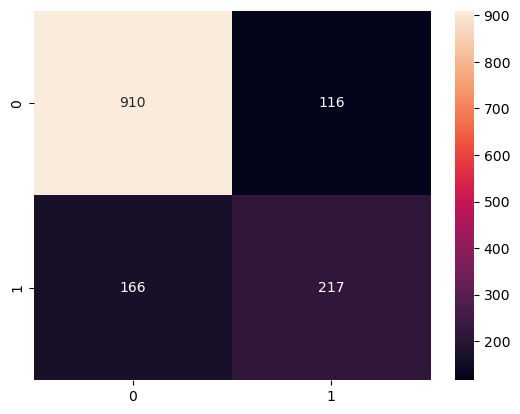

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()